## Portfolio Optimisation - finding the efficient frontier (PART 2)

### 1. Load packages

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load Data

In [3]:
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2020/12/31')
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2015-01-02  24.898552  43.848564  529.549988  308.519989  27.332500   
2015-01-05  24.197117  43.142586  519.460022  302.190002  26.562500   
2015-01-06  24.199400  42.888809  506.640015  295.290009  26.565001   
2015-01-07  24.538729  43.774734  505.149994  298.420013  26.937500   
2015-01-08  25.481558  44.785240  506.910004  300.459991  27.972500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   
2015-01-08  48.529999  506.910004  300.459991  28.037500  48.549999  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   
2015-01-08  495.019989  296.109985  27.307501  47.830002  501.510010   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  
2015-01-08  300.320007  237458000.0  5978200.0  3652700.0  3088400.0  

[5 rows x 24 columns]

### 3. Closing price only

In [4]:
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.898552,43.848564,529.549988,308.519989
2015-01-05,24.197117,43.142586,519.460022,302.190002
2015-01-06,24.199400,42.888809,506.640015,295.290009
2015-01-07,24.538729,43.774734,505.149994,298.420013
2015-01-08,25.481558,44.785240,506.910004,300.459991


### 4. Covariance matrix

In [5]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000349,0.000149,0.000193,0.000202
NKE,0.000149,0.000296,0.000138,0.000118
GOOGL,0.000193,0.000138,0.000283,0.000213
AMZN,0.000202,0.000118,0.000213,0.000375


### 5. Correlation matrix

In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.463833,0.612830,0.558062
NKE,0.463833,1.000000,0.478022,0.354615
GOOGL,0.612830,0.478022,1.000000,0.654721
AMZN,0.558062,0.354615,0.654721,1.000000


### 6. Portfolio Variance

In [7]:
w = {'AAPL': 0.2, 'NKE': 0.2, 'GOOGL': 0.2, 'AMZN': 0.4}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00022106791474543324

### 7. E(R) Calculate expected returns

In [8]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.456469
NKE      0.212536
GOOGL    0.183581
AMZN     0.392365
dtype: float64

### 8. Portfolio expected returns

In [9]:
w = [0.2, 0.2, 0.2, 0.4]
port_er = (w*ind_er).sum()
port_er

0.3274631168032972

### 9. Annual standard deviation

In [10]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.295509
NKE      0.272099
GOOGL    0.266086
AMZN     0.306379
dtype: float64

### 10. Create table

In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.456469,0.295509
NKE,0.212536,0.272099
GOOGL,0.183581,0.266086
AMZN,0.392365,0.306379


### 11. Defining the efficient frontier

To do this we need a combination of different stock weights within a portfolio. This can be best done using a loop. Each loop is a combination of different weights.

In [12]:
p_ret = [] # array for portfolio returns
p_vol = [] # array for portfolio volatility
p_weights = [] # empty array for asset weights

num_assets = len(df.columns) #number of companies
num_portfolios = 10000 #number of loops

#### 11.1 Loop

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [15]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.355082,0.233506,0.372435,0.298186,0.036090,0.293288
1,0.287156,0.229279,0.050936,0.362627,0.207214,0.379222
2,0.326357,0.242689,0.492199,0.110396,0.372192,0.025213
3,0.321418,0.238500,0.292738,0.087209,0.354574,0.265479
4,0.289411,0.227185,0.142612,0.279696,0.295993,0.281699


#### 11.2 Plot Efficient Frontier

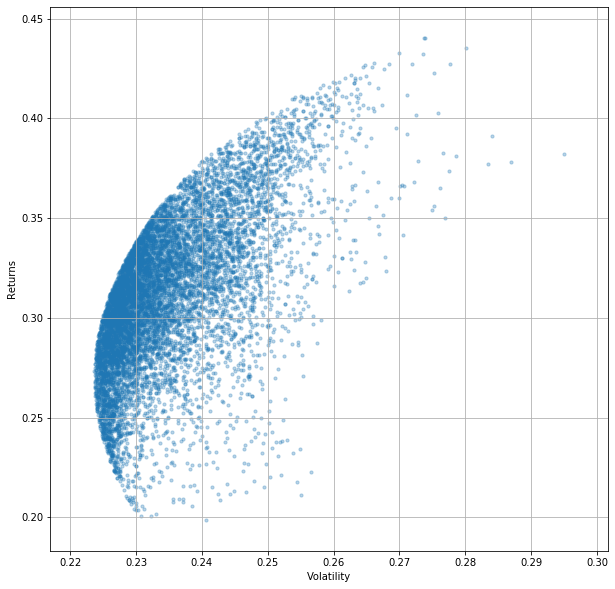

In [16]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])